<div class="alert alert-block alert-info">
   
***Tanisha Gauns***

What majorly affects prices of Gold?
    
__Introduction__

Have you ever walked into a jewelry shop, dazzled by the shimmering gold, only to leave empty-handed after hearing the price? Gold prices are a mystery to many, fluctuating seemingly without rhyme or reason. But what really drives these changes?  

In this project, I dive into the economic forces behind gold prices in India and the USA to uncover the key factors influencing this precious metal's value. Using the __Ordinary Least Squares (OLS)__ regression method, I’ll analyze how variables like __Crude oil prices, Interest rates, and the USD-INR__ exchange rate impact Gold Prices.  

By examining these relationships, I hope to shed light on the interplay between global markets, currency fluctuations, and economic policies that make gold prices rise and fall. Before diving into the analysis, I’ll clean and refine the data, creating visualizations to reveal initial patterns and trends. This journey promises to untangle the hidden dynamics of what makes gold sparkle—both in jewelry shops and on economic charts.
    
</div>

<div class="alert alert-block alert-danger">
    
In this project, I analyze the factors influencing gold prices using a comprehensive dataset sourced from Kaggle. The dataset provides a range of economic and financial indicators, allowing for an in-depth exploration of their relationships with gold prices. The data can be accessed at

__Link :'https://www.kaggle.com/datasets/somyaagarwal69/gold-forecasting'__
  

The variables in the dataset include:

__Gold_Price__: The market price of gold, a crucial benchmark for economic health and investment stability.

__Crude_Oil__: The price of crude oil, which significantly impacts inflation, energy markets, and global economic trends.

__Interest_Rate__: Central bank-set rates that influence borrowing costs, investments, and overall economic activity.

__USD_INR__: The exchange rate between the US Dollar and the Indian Rupee, indicating currency market fluctuations.

__Sensex__: An index tracking the performance of 30 leading companies on the Bombay Stock Exchange, reflecting Indian market trends.

__CPI (Consumer Price Index)__: A measure of inflation based on price changes in a basket of consumer goods and services.

__USD_Index__: An index measuring the strength of the US Dollar against a basket of other major currencies, illustrating its global performance.

I have used __crude oil prices, interest rates, and the USD-INR__ exchange rate in this project  to identify trends and insights into the factors that drive fluctuations in gold prices, offering a better understanding of economic dynamics and their interconnectedness.
    
</div>

In [1]:
# libraries 
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from scipy.optimize import minimize
import warnings 
warnings.filterwarnings("ignore")

# DATA CLEANING 

In [2]:
gold_data = pd.read_csv('GoldUP.csv')
gold_data.head()

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


In [3]:
# Data info
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           239 non-null    object 
 1   Gold_Price     239 non-null    int64  
 2   Crude_Oil      239 non-null    float64
 3   Interest_Rate  239 non-null    float64
 4   USD_INR        239 non-null    float64
 5   Sensex         239 non-null    float64
 6   CPI            239 non-null    float64
 7   USD_Index      239 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.1+ KB


In [4]:
gold_data.isna().sum() #there are no missing data.

Date             0
Gold_Price       0
Crude_Oil        0
Interest_Rate    0
USD_INR          0
Sensex           0
CPI              0
USD_Index        0
dtype: int64

In [5]:
gold_data['Date']

0      01-10-2000
1      01-11-2000
2      01-12-2000
3      01-01-2001
4      01-02-2001
          ...    
234    01-04-2020
235    01-05-2020
236    01-06-2020
237    01-07-2020
238    01-08-2020
Name: Date, Length: 239, dtype: object

In [6]:
gold_data['Year'] = gold_data['Date'].apply(lambda x:x.split('-')[-1])
gold_data

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index,Year
0,01-10-2000,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65,2000
1,01-11-2000,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24,2000
2,01-12-2000,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56,2000
3,01-01-2001,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52,2001
4,01-02-2001,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01,2001
...,...,...,...,...,...,...,...,...,...
234,01-04-2020,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57,2020
235,01-05-2020,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34,2020
236,01-06-2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39,2020
237,01-07-2020,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35,2020


In [7]:
gold_data['Month'] = gold_data['Date'].apply(lambda x:x.split('-')[1])
gold_data

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index,Year,Month
0,01-10-2000,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65,2000,10
1,01-11-2000,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24,2000,11
2,01-12-2000,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56,2000,12
3,01-01-2001,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52,2001,01
4,01-02-2001,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01,2001,02
...,...,...,...,...,...,...,...,...,...,...
234,01-04-2020,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57,2020,04
235,01-05-2020,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34,2020,05
236,01-06-2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39,2020,06
237,01-07-2020,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35,2020,07


In [8]:
#Dropping unnecessary columns for analysis
clean_data=gold_data.drop(columns=['Sensex','CPI','USD_Index'])

In [9]:
clean_data.head()

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Year,Month
0,01-10-2000,4538,1455.51,8.0,46.318297,2000,10
1,01-11-2000,4483,1512.47,8.0,46.783613,2000,11
2,01-12-2000,4541,1178.11,8.0,46.745856,2000,12
3,01-01-2001,4466,1208.18,8.0,46.536033,2001,01
4,01-02-2001,4370,1267.18,7.5,46.514595,2001,02


# DATA VISUALIZATION

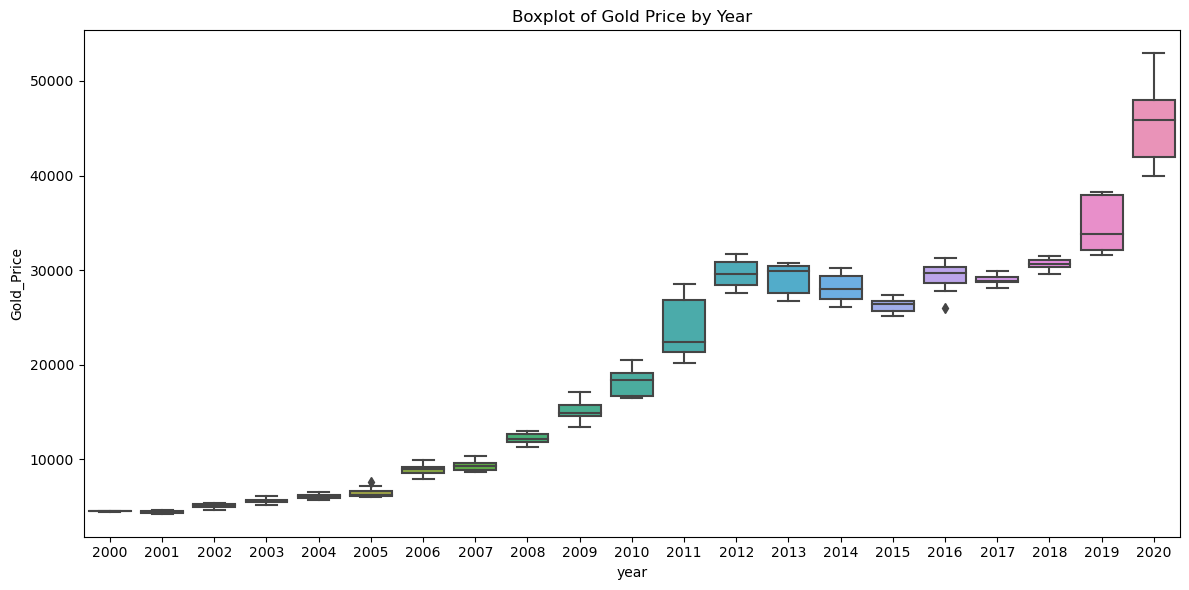

In [10]:
clean_data['year'] = pd.to_datetime(clean_data['Date']).dt.year
clean_data['month'] = pd.to_datetime(clean_data['Date']).dt.month


plt.figure(figsize=(12, 6))

# Box plot for Gold_Price based on Year
sns.boxplot(x='year', y='Gold_Price', data=clean_data)
plt.title('Boxplot of Gold Price by Year')

# Show the plot
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

The boxplot illustrates the yearly distribution of gold prices Between 2000 and 2020, gold prices in India and the United States exhibited notable trends shaped by economic, geopolitical, and local factors. From 2000 to 2006, prices remained relatively stable with limited fluctuations. However, the period from 2007 to 2011 saw a significant surge in prices, peaking in 2011, driven by heightened demand for gold as a safe-haven asset during the global financial crisis.

In India, the rise in prices was further influenced by cultural demand for gold during festivals and weddings, currency depreciation, and increased import costs. From 2012 to 2018, gold prices plateaued, showing moderate fluctuations, reflecting steadier market conditions. However, the years 2019 and 2020 witnessed another sharp increase, fueled by inflation concerns, economic uncertainty caused by the COVID-19 pandemic, and additional local factors such as rising import duties and the weakening rupee.
    
</div>

In [11]:
grouped_mean =pd.DataFrame(clean_data.groupby('year').mean().reset_index())
print(grouped_mean)

    year    Gold_Price    Crude_Oil  Interest_Rate    USD_INR  month
0   2000   4520.666667  1382.030000       8.000000  46.615922    1.0
1   2001   4461.750000  1147.705833       7.000000  47.165958    1.0
2   2002   5128.916667  1211.399167       6.458333  48.597453    1.0
3   2003   5616.666667  1346.545833       6.083333  46.588570    1.0
4   2004   6117.416667  1711.162500       6.000000  45.091634    1.0
5   2005   6442.000000  2356.033333       6.000000  43.923266    1.0
6   2006   8910.166667  2915.391667       6.000000  45.233586    1.0
7   2007   9343.333333  2922.384167       6.000000  41.370870    1.0
8   2008  12248.583333  4157.000833       6.000000  43.816968    1.0
9   2009  15227.750000  2975.815000       6.000000  48.376808    1.0
10  2010  18267.500000  3610.012500       6.000000  45.660899    1.0
11  2011  23871.666667  4850.494167       6.000000  46.553815    1.0
12  2012  29628.500000  5594.936667       8.833333  53.357469    1.0
13  2013  29221.500000  6104.51666

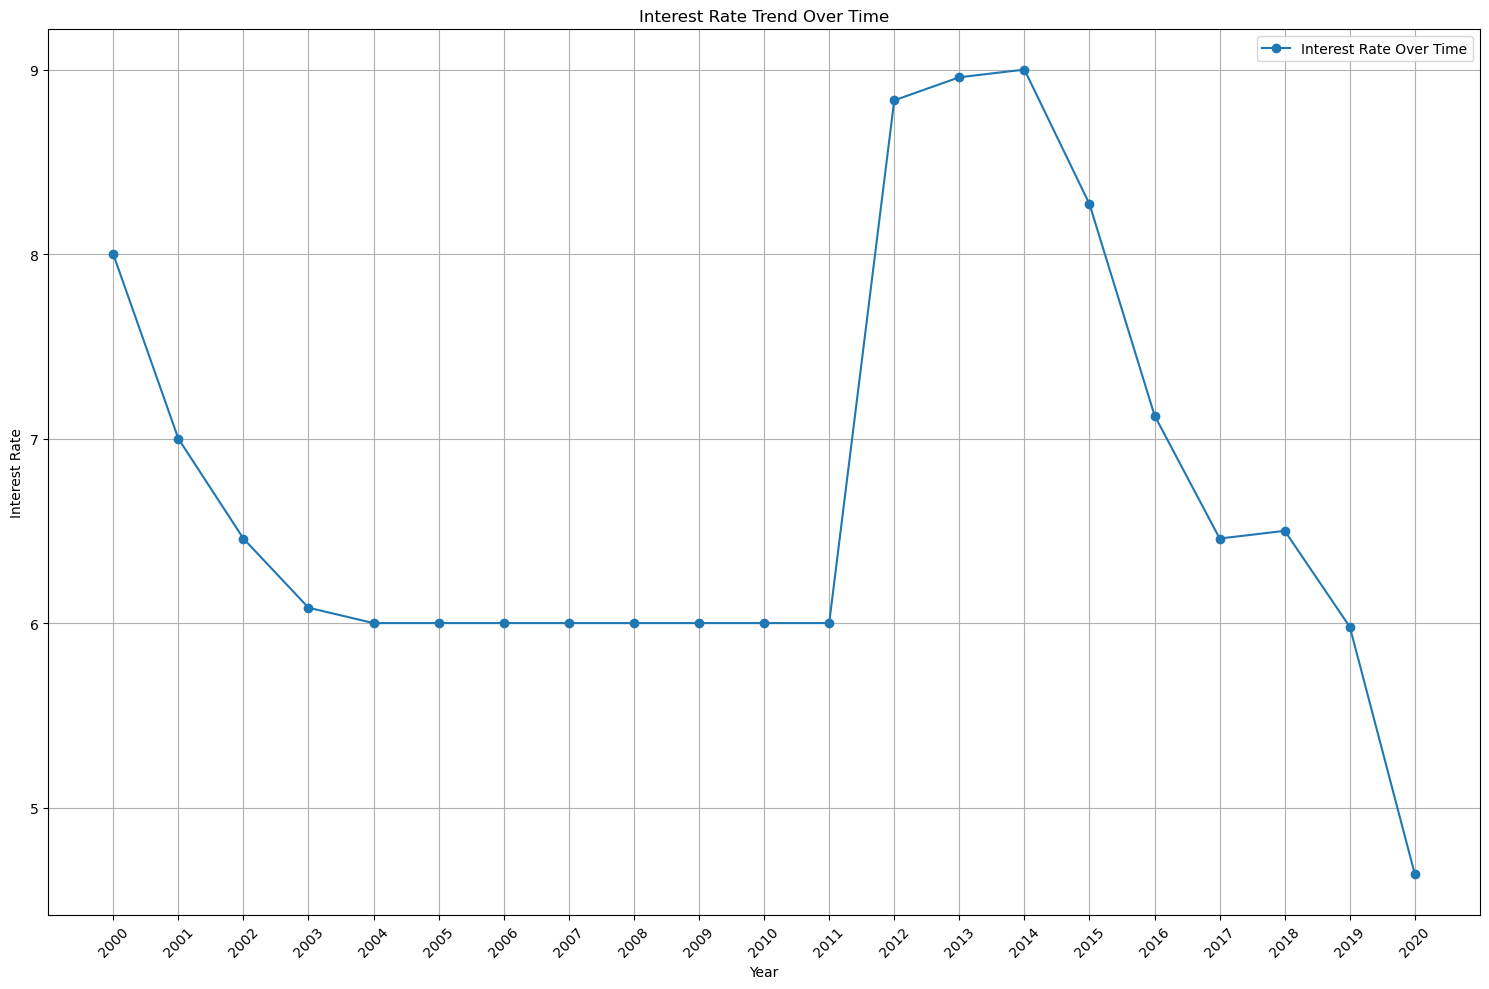

In [12]:
# Extract columns for plotting
x = grouped_mean['year']      
y_interest = grouped_mean['Interest_Rate'] 

# Create the line plot
plt.figure(figsize=(15, 10))  
plt.plot(x, y_interest, marker='o', label='Interest Rate Over Time')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Trend Over Time')
plt.legend()

plt.xticks(np.arange(2000, 2021, 1), rotation=45)

# Show grid and plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

<div class="alert alert-block alert-warning">
    
The graph illustrates the trend in interest rates over time, reflecting significant global and regional economic events. From 2000 to 2005, there is a noticeable decline in interest rates, likely reflecting efforts by central banks in India and the USA to stimulate economic growth. Between 2005 and 2008, the rates stabilize, signaling a period of steady economic expansion prior to the 2008 global financial crisis. The sharp increase in rates from 2008 to 2010 corresponds to the crisis, where the USA experienced temporary rate spikes due to credit risks, while India’s Reserve Bank likely raised rates to combat inflationary pressures. Post-2010, a consistent decline in rates reflects accommodative monetary policies adopted globally to support economic recovery. In the USA, the Federal Reserve maintained historically low rates to encourage investment, while in India, the Reserve Bank balanced inflation control with economic growth.
    
</div>

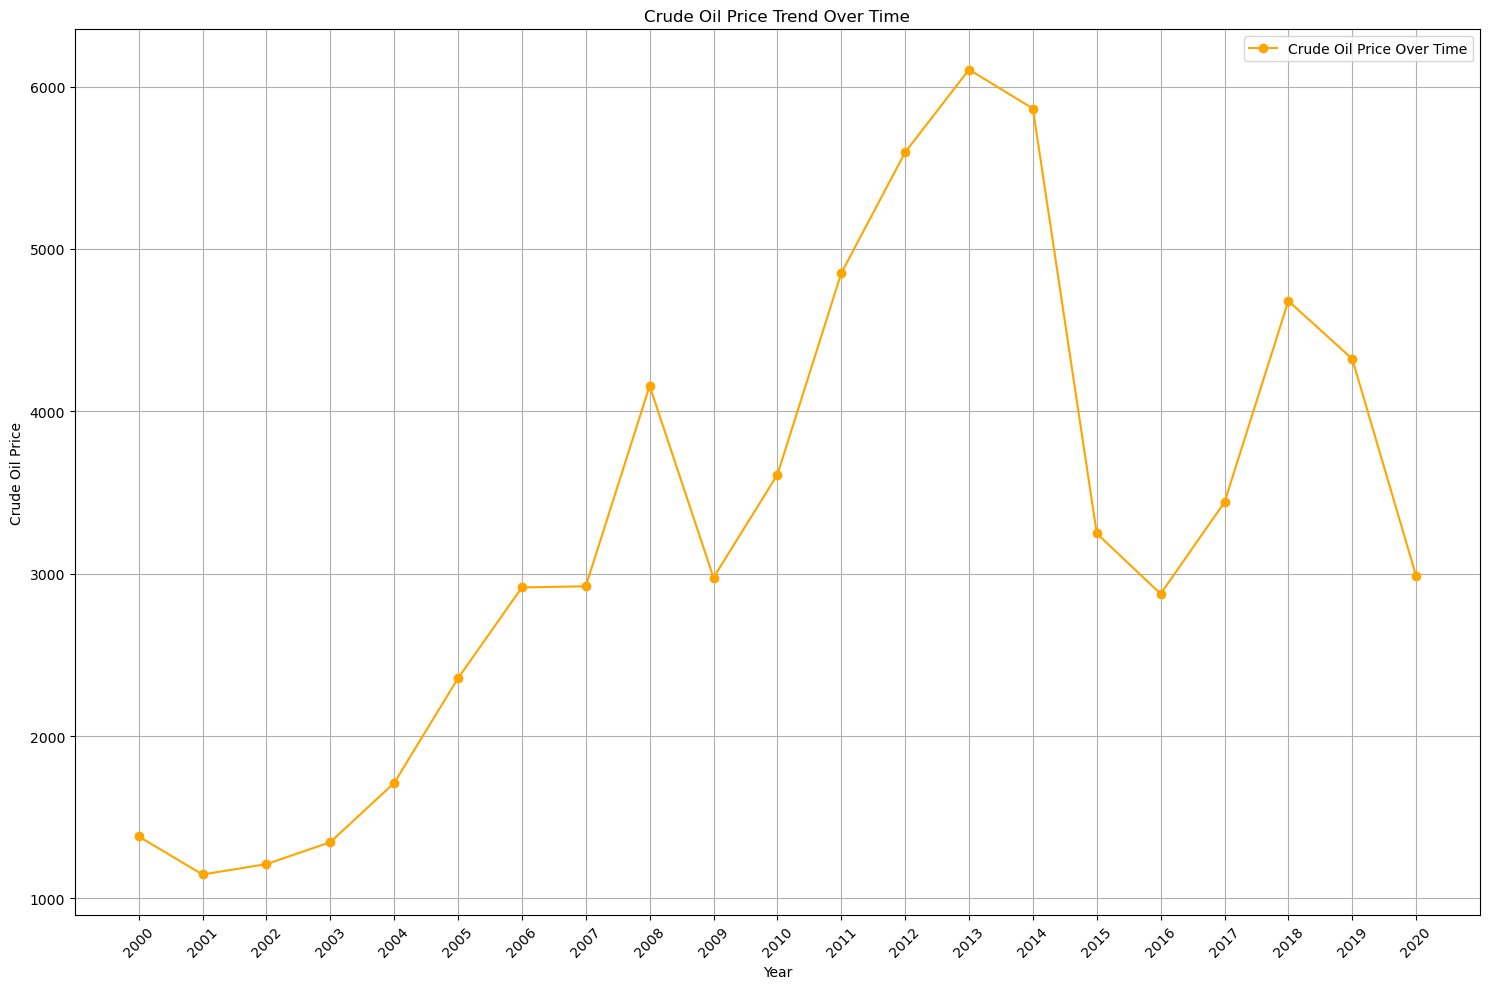

In [13]:
# Extract columns for plotting
x = grouped_mean['year']      
y_crude_oil = grouped_mean['Crude_Oil']  

# Create the line plot
plt.figure(figsize=(15, 10)) 
plt.plot(x, y_crude_oil, marker='o', color='orange', label='Crude Oil Price Over Time')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Trend Over Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(np.arange(2000, 2021, 1), rotation=45)

# Show grid and plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

<div class="alert alert-block alert-warning">

The graph illustrates the trend in crude oil prices from 2000 to 2020, highlighting significant fluctuations driven by global economic and market dynamics. During the early 2000s, crude oil prices rose steadily, reflecting increased demand and constrained supply, reaching a sharp peak in 2008. This was followed by a dramatic decline in 2009 due to economic disruptions that reduced global demand for oil. Prices recovered over the next few years, peaking again between 2012 and 2014, driven by market optimism and production constraints. However, from 2014 to 2016, crude oil prices plummeted sharply due to factors such as oversupply and shifting market conditions. Post-2016, prices showed notable volatility, with smaller peaks and troughs influenced by changes in production levels, market sentiment, and economic uncertainty. This trend underscores the vulnerability of crude oil prices to shifts in supply, demand, and broader economic pressures over time.
    
</div>

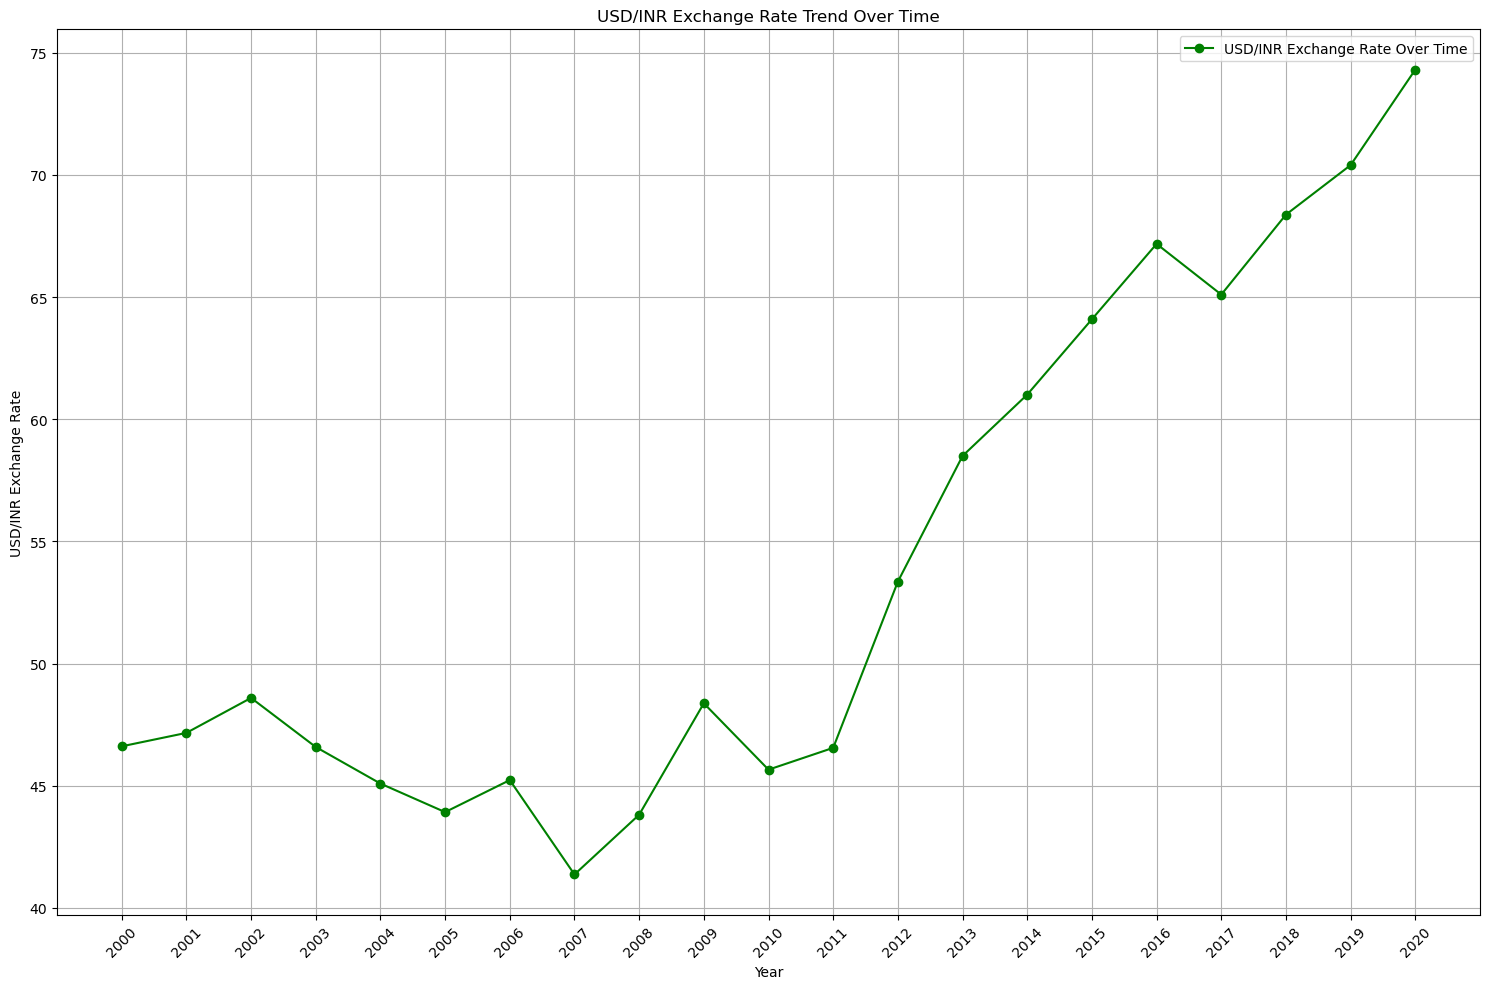

In [14]:
# Extract columns for plotting
x = grouped_mean['year']       
y_usd_inr = grouped_mean['USD_INR']  

# Create the line plot
plt.figure(figsize=(15, 10)) 
plt.plot(x, y_usd_inr, marker='o', color='green', label='USD/INR Exchange Rate Over Time')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('USD/INR Exchange Rate')
plt.title('USD/INR Exchange Rate Trend Over Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(np.arange(2000, 2021, 1), rotation=45)

# Show grid and plot
plt.grid(True)
plt.tight_layout()  
plt.show()

<div class="alert alert-block alert-warning">

The graph illustrates the trend of the USD/INR exchange rate from 2000 to 2020, showing how many Indian Rupees (INR) equaled 1 US Dollar (USD) over time. From 2000 to 2007, the exchange rate remained relatively stable, fluctuating between 45 and 50 INR. A noticeable dip occurred around 2008-2009, likely due to the global financial crisis and its impact on the Indian currency. Starting in 2010, the exchange rate began to show a steady upward trend, with the Indian Rupee depreciating against the US Dollar. This depreciation became more pronounced after 2013, with the exchange rate surpassing 70 INR by 2020. The overall trend reflects the weakening of the Indian Rupee over the two decades, influenced by factors such as global economic events, inflation, trade imbalances, and monetary policies.
    
</div> 

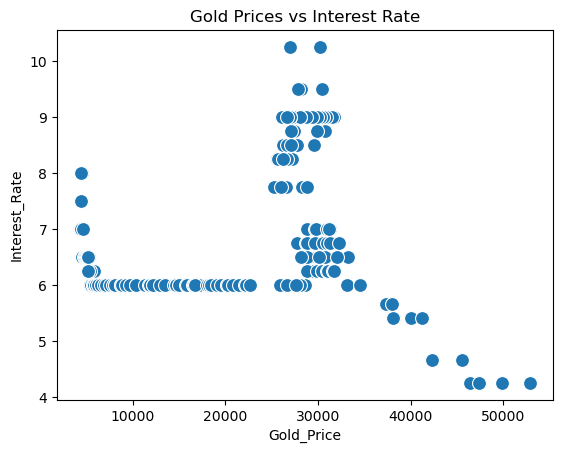

In [15]:
plt.title('Gold Prices vs Interest Rate')
sns.scatterplot(x='Gold_Price', 
                y='Interest_Rate', 
                s=100,
                data=clean_data);

<div class="alert alert-block alert-success">

The scatter plot illustrates the relationship between gold prices and interest rates, revealing an inverse relationship between the two variables. As gold prices rise, interest rates tend to decline, and as interest rates increase, gold prices typically decrease. This negative correlation is consistent with economic principles, as gold is often considered a safe-haven asset. When interest rates are low, the opportunity cost of holding gold diminishes because alternative investments, such as bonds or savings accounts, yield lower returns. This makes gold more appealing to investors, driving its price upward. Conversely, when interest rates rise, investors are incentivized to shift toward interest-bearing assets, reducing the demand for gold and leading to a decline in its price.

This relationship highlights the crucial role of monetary policy in influencing investment behavior. Central banks adjust interest rates to manage inflation, economic growth, and financial stability, which indirectly impacts gold prices. For instance, during periods of economic uncertainty or financial market volatility, gold often serves as a hedge against risk, and its demand increases regardless of interest rate levels. Additionally, the scatter plot underscores how gold prices can act as a barometer of market sentiment, reflecting investor confidence and expectations about future economic conditions.

Another key insight is that the inverse relationship between gold prices and interest rates can provide valuable information for portfolio diversification. Investors often consider gold as a counterbalance to other assets that are more sensitive to changes in interest rates. Moreover, the movement in gold prices relative to interest rates can signal shifts in global economic trends, such as inflationary pressures, currency devaluation, or geopolitical risks. This makes the relationship between gold prices and interest rates a critical area of focus for economists, policymakers, and financial analysts aiming to understand and navigate market dynamics effectively.
 
</div> 

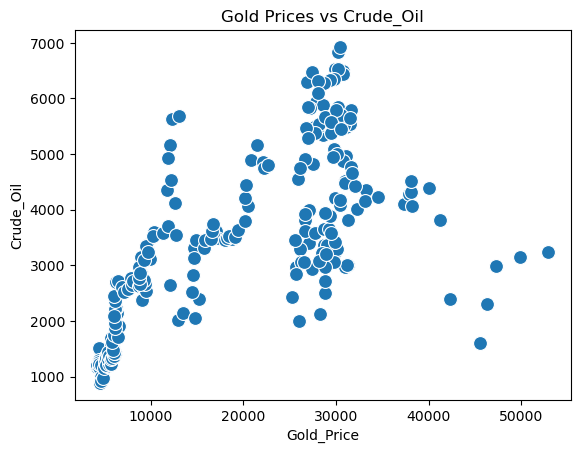

In [16]:
plt.title('Gold Prices vs Crude_Oil')
sns.scatterplot(x='Gold_Price', 
                y='Crude_Oil', 
                s=100,
                data=clean_data);

<div class="alert alert-block alert-success">

The scatter plot illustrates the relationship between gold prices and crude oil prices, two key economic indicators. Gold is often viewed as a safe-haven asset, while crude oil is a fundamental commodity that influences energy markets and global economic activity. The graph shows that as crude oil prices increase, gold prices tend to rise, indicating a positive correlation between the two variables. This relationship could be explained by inflationary pressures—higher oil prices often lead to increased production costs, fueling inflation, which in turn raises demand for gold as a hedge against inflation. Additionally, both assets are influenced by global economic conditions and investor sentiment, which may align their price movements. However, the scatter suggests some variability, implying the relationship is not perfectly linear. Overall, this positive relationship underscores the interconnectedness of commodity markets in the broader economic context.

</div>     

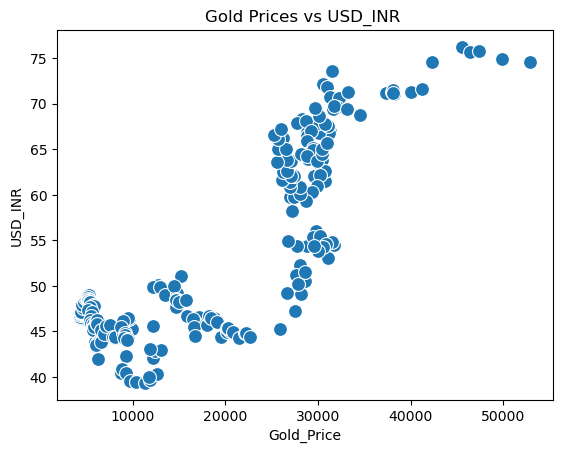

In [17]:
plt.title('Gold Prices vs USD_INR ')
sns.scatterplot(x='Gold_Price', 
                y='USD_INR', 
                s=100,
                data=clean_data);

<div class="alert alert-block alert-success">

The scatter plot illustrates the relationship between gold prices and the USD to INR exchange rate. The diagram shows a clear positive trend, indicating that as gold prices increase, the value of the USD relative to the INR also tends to rise. This suggests a positive correlation between the two variables, which can be explained within an economic context.

Gold is often considered a global commodity and a safe-haven asset. Its price movements are influenced by macroeconomic factors such as currency fluctuations. A rising USD-INR exchange rate implies the Indian rupee is depreciating against the US dollar, making gold more expensive in India, one of the largest gold-consuming countries. This phenomenon reflects the interconnectedness of commodity markets and exchange rates. Additionally, the variability observed in the scatter plot suggests that while the relationship is strong, other factors like global demand for gold, crude oil prices, and interest rates might also play a role in influencing this dynamic.
    
</div> 

# DATA WRANGLING AND TRAIN - TEST  SPLIT

In [18]:
X=clean_data[['Interest_Rate','Crude_Oil','USD_INR']]

In [19]:
X

,Interest_Rate,Crude_Oil,USD_INR
0,8.00,1455.51,46.318297
1,8.00,1512.47,46.783613
2,8.00,1178.11,46.745856
3,8.00,1208.18,46.536033
4,7.50,1267.18,46.514595
...,...,...,...
234,4.65,1603.02,76.222334
235,4.25,2298.55,75.666063
236,4.25,2987.46,75.763427
237,4.25,3156.01,74.908993


In [20]:
X['Interest_Rate'] = X['Interest_Rate'].apply(lambda x : np.log(x))

In [21]:
X['Crude_Oil'] = X['Crude_Oil'].apply(lambda x : np.log(x))

In [22]:
X['USD_INR'] = X['USD_INR'].apply(lambda x : np.log(x))

In [23]:

y=clean_data[['Gold_Price']]

In [24]:
y

,Gold_Price
0,4538
1,4483
2,4541
3,4466
4,4370
...,...
234,45504
235,46343
236,47315
237,49878


In [25]:

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

In [26]:
df_train = pd.concat([X_train, y_train], axis=1)

In [27]:
df_test = pd.concat([X_test,y_test],axis=1) 

In [28]:
df_test.head()

,Interest_Rate,Crude_Oil,USD_INR,Gold_Price
87,1.791759,8.180520,3.672920,11291
214,1.909543,8.505633,4.242092,29644
142,2.197225,8.673983,4.016623,30180
206,1.832581,8.276647,4.162155,28763
175,2.140066,8.291241,4.153503,27093


In [29]:
df_train.head()

,Interest_Rate,Crude_Oil,USD_INR,Gold_Price
191,1.945910,8.008382,4.201159,31178
102,1.791759,7.831053,3.912688,14475
231,1.686399,8.388430,4.266400,39984
13,1.871802,6.799134,3.870874,4604
114,1.791759,8.228423,3.794504,16693


# MANUAL OPTIMIZATION 

In [30]:
X_val = X_train.values
y_val = y_train.values

In [31]:
X_val[:20]

array([[1.94591015, 8.0083822 , 4.20115927],
       [1.79175947, 7.8310534 , 3.91268818],
       [1.68639895, 8.38842984, 4.26639975],
       [1.87180218, 6.7991339 , 3.87087387],
       [1.79175947, 8.22842253, 3.79450443],
       [1.79175947, 8.14934174, 3.84385641],
       [1.79175947, 7.53914939, 3.77815309],
       [1.68639895, 8.41400143, 4.26510946],
       [2.1102132 , 8.27264723, 4.15544855],
       [2.2512918 , 8.68736625, 3.91616308],
       [1.79175947, 7.9978783 , 3.69934826],
       [1.79175947, 7.21771485, 3.82741811],
       [1.79175947, 8.15472148, 3.83905008],
       [2.01490302, 7.14454924, 3.83976613],
       [1.79175947, 7.9603341 , 3.83123622],
       [1.79175947, 8.08298904, 3.67752172],
       [2.1690537 , 8.76962832, 4.13659593],
       [1.9095425 , 8.11823387, 4.18773393],
       [1.87180218, 6.88024019, 3.88495544],
       [1.79175947, 8.42088271, 3.81868893]])

In [32]:
y_val[:20]

array([[31178],
       [14475],
       [39984],
       [ 4604],
       [16693],
       [15882],
       [ 6149],
       [38092],
       [26646],
       [27854],
       [ 8741],
       [ 5462],
       [18745],
       [ 4370],
       [ 8998],
       [ 9691],
       [30740],
       [28758],
       [ 4901],
       [12220]])

In [33]:
X_b = np.c_[np.ones((X_val.shape[0], 1)), X_val]


In [34]:
X_b[:10]

array([[1.        , 1.94591015, 8.0083822 , 4.20115927],
       [1.        , 1.79175947, 7.8310534 , 3.91268818],
       [1.        , 1.68639895, 8.38842984, 4.26639975],
       [1.        , 1.87180218, 6.7991339 , 3.87087387],
       [1.        , 1.79175947, 8.22842253, 3.79450443],
       [1.        , 1.79175947, 8.14934174, 3.84385641],
       [1.        , 1.79175947, 7.53914939, 3.77815309],
       [1.        , 1.68639895, 8.41400143, 4.26510946],
       [1.        , 2.1102132 , 8.27264723, 4.15544855],
       [1.        , 2.2512918 , 8.68736625, 3.91616308]])

In [35]:
def loss_function(beta, X, y):
    y_pred = X @ beta
    mse = (np.mean((y - y_pred)**2))**0.5
    return mse

In [36]:
initial_beta = np.zeros(X_b.shape[1])


In [37]:
result = minimize(loss_function, initial_beta, args=(X_b, y_val))

In [38]:
optimized_beta = result.x
print("Optimized Coefficients:", optimized_beta)

Optimized Coefficients: [14303.476666   -1775.78524129   180.93709844  1673.50017021]


In [39]:
final_loss = loss_function(optimized_beta, X_b, y_val)
print("Final Loss:", final_loss)


Final Loss: 11527.525715247504


# Testing 

In [40]:
X_test = X_test.values


In [41]:
y_test = y_test.values


In [42]:
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [43]:
y_pred = X_test_b @ optimized_beta
print("Predictions:", y_pred)


Predictions: [18748.48822734 19550.66616039 18692.94240068 19512.12458233
 18954.26013079 18819.36643104 20424.21588709 20374.632117
 19089.03799634 19335.13862521 19407.66698823 18839.90245209
 19432.30230893 18770.41905021 18850.00902585 19017.08754434
 18816.13350847 19882.2505768  19041.60268185 18865.26983626
 18860.42007747 18347.3920866  19597.97045278 19012.33899277
 18810.99055877 18890.16657165 18604.53870444 18595.05930309
 18761.11113023 18882.5088023  18872.37542622 18750.63795373
 18836.70648813 18821.56034682 18958.42144811 19351.46177062
 18573.64766024 19021.36566919 19085.28641423 18999.39168015
 19544.54499158 19024.85858005 20196.98127408 18820.07223925
 18989.71281706 19669.18067076 18894.60272661 18783.97041667]


In [44]:
test_loss=loss_function(optimized_beta,X_test_b,y_test)

In [45]:
test_loss

12139.113761459126

# Final Model

In [46]:
optimized_beta = result.x
print("Optimized Coefficients:", optimized_beta)

Optimized Coefficients: [14303.476666   -1775.78524129   180.93709844  1673.50017021]


$14303.476-1775.785(Interest Rate) +180.9370 (Crude Oil)+1673.500 (Exchange Rate)$

# CONCLUSION

<div class="alert alert-block alert-info">

__Interest Rate (-1775.785)__: The negative coefficient indicates that an increase in the interest rate leads to a decrease in gold prices. Specifically, for every 1% increase in the interest rate, gold prices are expected to decrease by 1775.785 units, suggesting that higher interest rates reduce the appeal of non-yielding assets like gold.

__Crude Oil (+180.9370)__: The positive coefficient suggests that as crude oil prices increase, gold prices rise as well. For every unit increase in crude oil price, gold prices are expected to increase by 180.9370 units, reflecting the potential impact of inflationary pressures driven by higher energy costs.

__Exchange Rate (+1673.500)__: The positive coefficient indicates that as the USD/INR exchange rate increases (i.e., the INR weakens against the USD), gold prices rise. For every unit increase in the exchange rate, gold prices are expected to increase by 1673.500 units, as gold becomes more expensive in terms of the local currency.


The results highlight the dynamic nature of gold prices and their sensitivity to macroeconomic variables. A rise in interest rates may reduce gold's attractiveness as an investment, while increases in crude oil prices and a weaker INR tend to push gold prices higher. Investors often view gold as a hedge against inflation and currency depreciation, particularly during periods of global economic uncertainty. Policymakers, especially in countries like India where gold imports significantly affect the trade deficit, may consider these factors when formulating strategies to manage inflation, currency stability, and fiscal pressures.
    
</div> 

# REFERENCES 

- In this project, the __Ordinary Least Squares (OLS)__ regression method code was obtained from materials presented in my lecture notes. 
- The dataset used in this project was obtained from Kaggle and is available at the following link: 'https://www.kaggle.com/datasets/somyaagarwal69/gold-forecasting'